<a href="https://colab.research.google.com/github/sajeebju/Geophysics-Lab/blob/main/Exercise_14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The travel times of waves at first arrival are given in the table below.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

x = np.arange(0, 3 + 0.2, 0.2)
time = np.array([0, 0.25, .50, .75, 1.0, 1.25, 1.47, 1.56, 1.65, 1.75, 1.84, 1.93, 2.01, 2.07, 2.13, 2.18])

df = pd.DataFrame({"X(km)" : x, "Time(s)" : time})
df

,X(km),Time(s)
0,0.0,0.00
1,0.2,0.25
2,0.4,0.50
3,0.6,0.75
4,0.8,1.00
5,1.0,1.25
6,1.2,1.47
7,1.4,1.56
8,1.6,1.65
9,1.8,1.75


1. Determine the number of layers from the
time distance curve and find out the wave
velocity in each layer and thickness of the
layers, if the layering is horizontal and there is
no low speed layer or blind zone in the
section


2. From the velocities found above, what rock
types you would expect to encounter in a drill
hole?

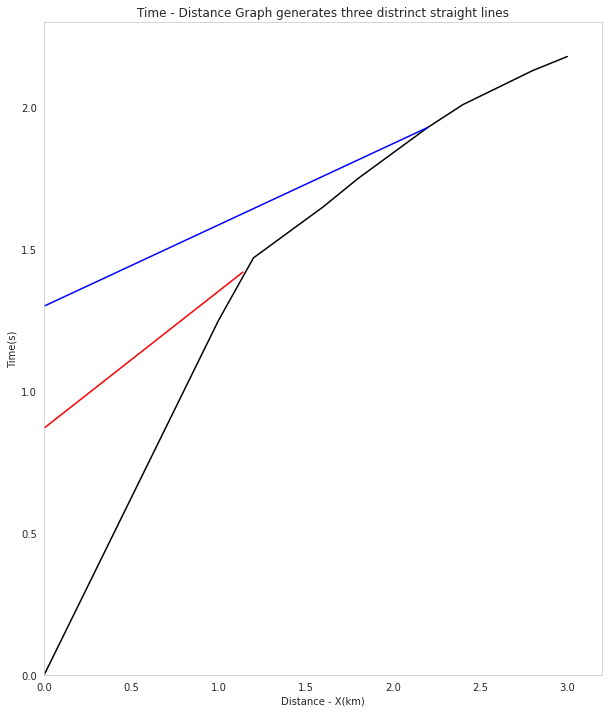

In [10]:
sns.set_style("whitegrid")
plt.figure(figsize = (10, 12))
plt.plot(df["X(km)"] , df["Time(s)"],color = "k")
#extrapolate_1
ext_x = [0, 1.14]
ext_y = [0.87, 1.42]
plt.plot(ext_x, ext_y, color = "red")
#extrapolate_1
ext_x1 = [0, 2.2]
ext_y1 = [1.3, 1.93]
plt.plot(ext_x1, ext_y1, color = "b")
plt.xlabel("Distance - X(km)")
plt.ylabel("Time(s)")
plt.title("Time - Distance Graph generates three distrinct straight lines")
plt.xlim(0, 3.2)
plt.ylim(0, 2.3)
plt.grid()
plt.show()

In [4]:
# slope determination manual graph paper
# slope 1/v1 = (t2-t1)/(x2-x1)

def velocity_not(t1, t2, x1, x2):
  v_not = (x2 - x1) / (t2 - t1)
  return v_not

def velocity_one(t1, t2, x1, x2):
  v_one = (x2 - x1) / (t2 - t1)
  return v_one

def velocity_two(t1, t2, x1, x2):
  v_two = (x2 - x1) / (t2 - t1)
  return v_two


# for first straight line
t2_not = 0.75
t1_not = 0.4
x2_not = 0.6
x1_not = 0.32
v_not = round(velocity_not(t1_not, t2_not, x1_not, x2_not), 3)

# for second straight line
t2_one = 1.84
t1_one = 1.6
x2_one = 2.0
x1_one = 1.5
v_one = round(velocity_one(t1_one, t2_one, x1_one, x2_one), 3)

# for third straight line
t2_two = 2.13
t1_two = 2.0
x2_two = 2.8
x1_two = 2.4
v_two = round(velocity_two(t1_two, t2_two, x1_two, x2_two), 3)
  
# velocity

print("v_not = " + str(v_not) + " km/s")
print("v_one = " + str(v_one) + " km/s")
print("v_two = " + str(v_two) + " km/s")

v_not = 0.8 km/s
v_one = 2.083 km/s
v_two = 3.077 km/s


In [7]:
#From graph paper 
# The thickness of the first layer can be obtained by the time_one = 0.87 s
# The thickness of the second layer can be obtained by the time_two = 1.3 s

ti_one = 0.87
ti_two = 1.3

def depth_not(v_not, v_one, ti_one):
  h_not = (ti_one * v_one * v_not) / (2 * np.sqrt(v_one**2 - v_not**2))
  return h_not

def depth_one(v_not, v_one, v_two, ti_two):
  h_one = ((v_two * v_one) / (2 * np.sqrt(v_two**2 - v_one**2))) * (ti_two -(2 * depth_not(v_not, v_one, ti_one) * np.sqrt(v_two**2 - v_not**2) ) / (v_two * v_not))
  return h_one

h_not = round(depth_not(v_not, v_one, ti_one), 3)
h_one = round(depth_one(v_not, v_one, v_two, ti_two), 3)

print("The thickness of the first layer = " +  str(h_not) + " km")
print("The thickness of the second layer = " +  str(h_one) + " km")


The thickness of the first layer = 0.377 km
The thickness of the second layer = 0.552 km
